# City Life: Data Visualization

**DV, AI-Advanced**

Explore urban dynamics through data visualization, focusing on city life using public data sources. 

### Assignment Overview
Create interactive visualizations to analyze:
- Relationship between green spaces and neighborhood wealth
- Social parameters like happiness and inclusivity
- Factors influencing well-being in the city

### Data Sources
Utilize open data from:
- [Eindhoven InCijfers](https://eindhoven.incijfers.nl/jive)
- [Leiden InCijfers](https://leiden.incijfers.nl/jive)
- [Haarlem InCijfers](https://haarlem.incijfers.nl/databank)

## Imports

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Path and Load Dataset

In [2]:
# Path to the dataset
file_path = './data/eindhoven-data.csv'

In [3]:
# Load the dataset
def load_data(file_path):
    """
    Function to load data from a given file path.
    Args:
    - file_path (str): Path to the data file

    Returns:
    - DataFrame: Loaded data as a Pandas DataFrame
    """
    try:
        data = pd.read_csv(file_path, delimiter=';')
        print(f"Data loaded successfully from {file_path}")
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Load the dataset
data = load_data(file_path)

# Inspect the dataset
print("Dataset Head:")
print(data.head())

print("\nDataset Info:")
print(data.info())

Data loaded successfully from ./data/eindhoven-data.csv
Dataset Head:
                      Buurten Inwoners Mannen % Vrouwen % Totaal 0-9 jaar  \
0  Achtse Barrier-Gunterslaer     3742     49,9      50,1             404   
1       Achtse Barrier-Hoeven     3885     50,5      49,5             391   
2    Achtse Barrier-Spaaihoef     4521     51,6      48,4             482   
3                     Barrier     2047     51,1      48,9             162   
4                        BeA2       28     60,7      39,3               1   

  Totaal 10-19 jaar Totaal 20-29 jaar Totaal 30-39 jaar Totaal 40-49 jaar  \
0               375               377               533               479   
1               412               354               551               478   
2               499               371               683               591   
3               252               373               280               274   
4                 0                 3                 6                 3   

  To

## Translate the data from Dutch to English

In [4]:
# Dictionary for column translations
column_translations = {
    'Buurten': 'Neighborhoods',
    'Inwoners': 'Inhabitants',
    'Mannen %': 'Men %',
    'Vrouwen %': 'Women %',
    'Totaal 0-9 jaar': 'Total 0-9 years',
    'Totaal 10-19 jaar': 'Total 10-19 years',
    'Totaal 20-29 jaar': 'Total 20-29 years',
    'Totaal 30-39 jaar': 'Total 30-39 years',
    'Totaal 40-49 jaar': 'Total 40-49 years',
    'Totaal 50-59 jaar': 'Total 50-59 years',
    'Totaal 60-69 jaar': 'Total 60-69 years',
    'Totaal 70-79 jaar': 'Total 70-79 years',
    'Totaal 80-89 jaar': 'Total 80-89 years',
    'Totaal 90 jaar en ouder': 'Total 90+ years',
    'Gemiddeld inkomen per inkomensontvanger': 'Average income per income receiver',
    'Gemiddeld inkomen per inwoner': 'Average income per inhabitant',
    'Percentage eenpersoons huishoudens': 'Percentage single-person households',
    'Percentage huishoudens zonder kinderen': 'Percentage households without children',
    'Percentage huishoudens met kinderen': 'Percentage households with children',
    'Gemiddelde huishoudgrootte': 'Average household size',
    'Percentage koopwoningen': 'Percentage owner-occupied homes',
    'Percentage huurwoningen': 'Percentage rental homes',
    'Percentage woningen ouder dan 2000': 'Percentage homes older than 2000',
    'Percentage woningen gebouwd tussen 2000 en 2010': 'Percentage homes built between 2000 and 2010',
    'Percentage woningen gebouwd na 2010': 'Percentage homes built after 2010',
    'Percentage appartementen': 'Percentage apartments',
    'Percentage tussenwoningen': 'Percentage terraced houses',
    'Percentage hoekwoningen': 'Percentage corner houses',
    'Percentage twee-onder-een-kapwoningen': 'Percentage semi-detached houses',
    'Percentage vrijstaande woningen': 'Percentage detached houses',
    'Aantal werklozen': 'Number of unemployed',
    'Percentage werklozen': 'Percentage unemployed',
    'Aantal bijstandsuitkeringen': 'Number of social assistance benefits',
    'Aantal WW-uitkeringen': 'Number of unemployment benefits',
    'Percentage bijstandsuitkeringen': 'Percentage social assistance benefits',
    'Percentage WW-uitkeringen': 'Percentage unemployment benefits',
    'Percentage kinderen in de bijstand': 'Percentage children in social assistance',
    'Percentage huishoudens met laag inkomen': 'Percentage households with low income',
    'Percentage huishoudens met hoog inkomen': 'Percentage households with high income',
    'Percentage personen met laag inkomen': 'Percentage persons with low income',
    'Percentage personen met hoog inkomen': 'Percentage persons with high income',
    'Percentage AOW-gerechtigden': 'Percentage state pension recipients',
    'Percentage WW-gerechtigden': 'Percentage unemployment benefit recipients',
    'Percentage AO-gerechtigden': 'Percentage disability benefit recipients',
    'Percentage Wajong-gerechtigden': 'Percentage young disabled benefit recipients',
    'Percentage bijstands-gerechtigden': 'Percentage social assistance recipients',
    'Totaal aantal woningen': 'Total number of homes',
    'Aantal huurwoningen': 'Number of rental homes',
    'Aantal koopwoningen': 'Number of owner-occupied homes',
    'Aantal particuliere huurwoningen': 'Number of private rental homes',
    'Aantal sociale huurwoningen': 'Number of social rental homes',
    'Percentage bewoners geboren in Nederland': 'Percentage residents born in the Netherlands',
    'Percentage bewoners geboren in buitenland': 'Percentage residents born abroad',
    'Percentage bewoners 0-4 jaar': 'Percentage residents 0-4 years',
    'Percentage bewoners 5-9 jaar': 'Percentage residents 5-9 years',
    'Percentage bewoners 10-14 jaar': 'Percentage residents 10-14 years',
    'Percentage bewoners 15-19 jaar': 'Percentage residents 15-19 years',
    'Percentage bewoners 20-24 jaar': 'Percentage residents 20-24 years',
    'Percentage bewoners 25-29 jaar': 'Percentage residents 25-29 years',
    'Percentage bewoners 30-34 jaar': 'Percentage residents 30-34 years',
    'Percentage bewoners 35-39 jaar': 'Percentage residents 35-39 years',
    'Percentage bewoners 40-44 jaar': 'Percentage residents 40-44 years',
    'Percentage bewoners 45-49 jaar': 'Percentage residents 45-49 years',
    'Percentage bewoners 50-54 jaar': 'Percentage residents 50-54 years',
    'Percentage bewoners 55-59 jaar': 'Percentage residents 55-59 years',
    'Percentage bewoners 60-64 jaar': 'Percentage residents 60-64 years',
    'Percentage bewoners 65-69 jaar': 'Percentage residents 65-69 years',
    'Percentage bewoners 70-74 jaar': 'Percentage residents 70-74 years',
    'Percentage bewoners 75-79 jaar': 'Percentage residents 75-79 years',
    'Percentage bewoners 80-84 jaar': 'Percentage residents 80-84 years',
    'Percentage bewoners 85-89 jaar': 'Percentage residents 85-89 years',
    'Percentage bewoners 90+ jaar': 'Percentage residents 90+ years',
    'Gemiddeld vermogen per huishouden': 'Average wealth per household',
    'Percentage huishoudens met negatief vermogen': 'Percentage households with negative wealth',
    'Percentage huishoudens met laag vermogen': 'Percentage households with low wealth',
    'Percentage huishoudens met hoog vermogen': 'Percentage households with high wealth',
    'Aantal autovrije huizen': 'Number of car-free homes',
    'Aantal bedrijven': 'Number of businesses',
    'Aantal werkzame personen': 'Number of employed persons',
    'Aantal bedrijfsvestigingen': 'Number of business establishments',
    'Bedrijfsvestigingen totaal': 'Total business establishments',
    'Totaal aantal werkzame personen (inclusief uitzendkrachten)': 'Total number of employed persons (including temporary workers)',
    'Totaal aantal winkelpanden': 'Total number of shop premises',
    'Afstand tot grote supermarkt': 'Distance to large supermarket',
    'Afstand tot overige dagelijkse levensmiddelen': 'Distance to other daily groceries',
    'Totaal verkoopvloeropp winkelpanden': 'Total sales area shop premises',
    'tevreden over afvoer van het regenwater als het flink geregend heeft': 'Satisfied with rainwater drainage after heavy rain',
    'tevreden over de kwaliteitsbewaking van het \'openbare water\'': 'Satisfied with public water quality monitoring',
    'WW\'ers tov aantal 15 t/m 64 jarigen %': 'Unemployment benefits recipients as percentage of 15-64 years old',
    'AO\'ers tov aantal 15 t/m 64 jarigen %': 'Disability benefits recipients as percentage of 15-64 years old',
    'flat, appartement, etagewoning': 'Flat, apartment, storey house',
    'meergezinswoningen %': 'Multi-family homes %',
    'totaal eengezinswoningen': 'Total single-family homes',
    'eengezins, geschakeld-vrij of halfvrijstaand': 'Single-family, linked or semi-detached',
    'eengezins tussenwoning': 'Single-family terraced house',
    'eengezins vrijstaand': 'Single-family detached house',
    'eengezinswoningen %': 'Single-family homes %',
    'heeft last van vervuilde lucht %': 'Has air pollution issues %',
    'heeft last van stank %': 'Has odor issues %',
    'heeft last van (minstens 1 vorm van) geluidshinder %': 'Has noise pollution issues %',
    'ondervond hinder van water door hevige regenbuien in de openbare ruimte': 'Experienced water nuisance from heavy rain in public space',
    'ondervond hinder van warmte in de openbare ruimte': 'Experienced heat nuisance in public space',
    'ondervond hinder van droogte in het openbaar groen': 'Experienced drought nuisance in public green areas',
    'gemiddeld elektriciteitsverbruik totaal': 'Average electricity consumption total',
    'gemiddeld aardgasverbruik totaal': 'Average natural gas consumption total',
    'woningen met stadsverwarming %': 'Homes with district heating %',
    'voelt zich (zeer) onveilig als gevolg van gevaarlijke stoffen/straling/luchtverontreiniging %': 'Feels unsafe due to hazardous materials/radiation/air pollution %',
    'tevreden over het onderhoud van de bomen in het park/groengebied': 'Satisfied with the maintenance of trees in park/green area',
    'tevreden over het onderhoud van de bomen in uw buurt': 'Satisfied with the maintenance of trees in your neighborhood',
    'tevredenheid over de inrichting van de openbare ruimte': 'Satisfaction with the design of public space',
    'tevredenheid over het onderhoud van de openbare ruimte': 'Satisfaction with the maintenance of public space',
    '% tevreden over de inrichting van groen in de openbare ruimte': '% satisfied with the design of greenery in public',
    'corporatiewoningen %': 'Corporate homes %',
    '% tevreden over het onderhoud van groen in de openbare ruimte': '% satisfied with the maintenance of greenery in public space',
    'rapportcijfer voor het onderhoud/reparatie van de buurt': 'Score for maintenance/repair of the neighborhood',
    'rapportcijfer voor het schoonhouden van de straat': 'Score for street cleanliness',
    'vindt Eindhoven een groene stad': 'Considers Eindhoven a green city',
    'schaalscore fysieke kwaliteit buurtvoorzieningen': 'Scale score physical quality neighborhood facilities',
    'Heeft een langdurige ziekte': 'Has a chronic illness',
    'Voelt zich niet zo gelukkig of ongelukkig': 'Feels not so happy or unhappy',
    'Beoordeling eigen gezondheid: matig of slecht': 'Assessment of own health: moderate or poor',
    'Door langdurige ziekte sterk belemmerd thuis': 'Severely hindered at home due to chronic illness',
    'Door langdurige ziekte sterk belemmerd in vrije tijd': 'Severely hindered in leisure time due to chronic illness'
}

# Translate column names using the dictionary
def translate_columns(df, translations):
    """
    Function to translate column names to English using a dictionary.
    Args:
    - df (DataFrame): Data with original column names
    - translations (dict): Dictionary with Dutch-to-English translations

    Returns:
    - DataFrame: Data with translated column names
    """
    df = df.rename(columns=translations)
    return df

# Translate column names
data_translated = translate_columns(data, column_translations)
print("\nTranslated Column Names:")
print(data_translated.columns)


Translated Column Names:
Index(['Neighborhoods', 'Inhabitants', 'Men %', 'Women %', 'Total 0-9 years',
       'Total 10-19 years', 'Total 20-29 years', 'Total 30-39 years',
       'Total 40-49 years', 'Total 50-59 years', 'Total 60-69 years',
       'Total 70-79 years', 'Total 80-89 years', 'Total 90+ years',
       'koopwoningen %', 'huurwoningen %', 'Corporate homes %',
       'Flat, apartment, storey house', 'Multi-family homes %',
       'Total single-family homes', 'Single-family, linked or semi-detached',
       'Single-family terraced house', 'Single-family detached house',
       'Single-family homes %', 'Has air pollution issues %',
       'Has odor issues %', 'Has noise pollution issues %',
       'Experienced water nuisance from heavy rain in public space',
       'Experienced heat nuisance in public space',
       'Experienced drought nuisance in public green areas',
       'Average electricity consumption total',
       'Average natural gas consumption total',
       'Hom

## Data Cleaning and plotting

Data cleaned successfully
                 Neighborhoods  Inhabitants  Men %  Women %  Total 0-9 years  \
0   Achtse Barrier-Gunterslaer       3742.0   49.9     50.1            404.0   
1        Achtse Barrier-Hoeven       3885.0   50.5     49.5            391.0   
2     Achtse Barrier-Spaaihoef       4521.0   51.6     48.4            482.0   
3                      Barrier       2047.0   51.1     48.9            162.0   
4                         BeA2         28.0   60.7     39.3              1.0   
5                      Beemden          NaN    NaN      NaN              NaN   
6                Bennekel-Oost       3348.0   53.9     46.1            277.0   
7    Bennekel-West, Gagelbosch       3342.0   50.3     49.7            227.0   
8                       Bergen       2906.0   55.2     44.8            118.0   
9                   Binnenstad       4074.0   59.1     40.9            118.0   
10                   Blaarthem       2523.0   52.5     47.5            208.0   
11            

/var/folders/ty/7lsx87292f75gf7wyl53gzbr0000gn/T/ipykernel_70146/1966258026.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col].str.replace(',', '.'), errors='coerce')


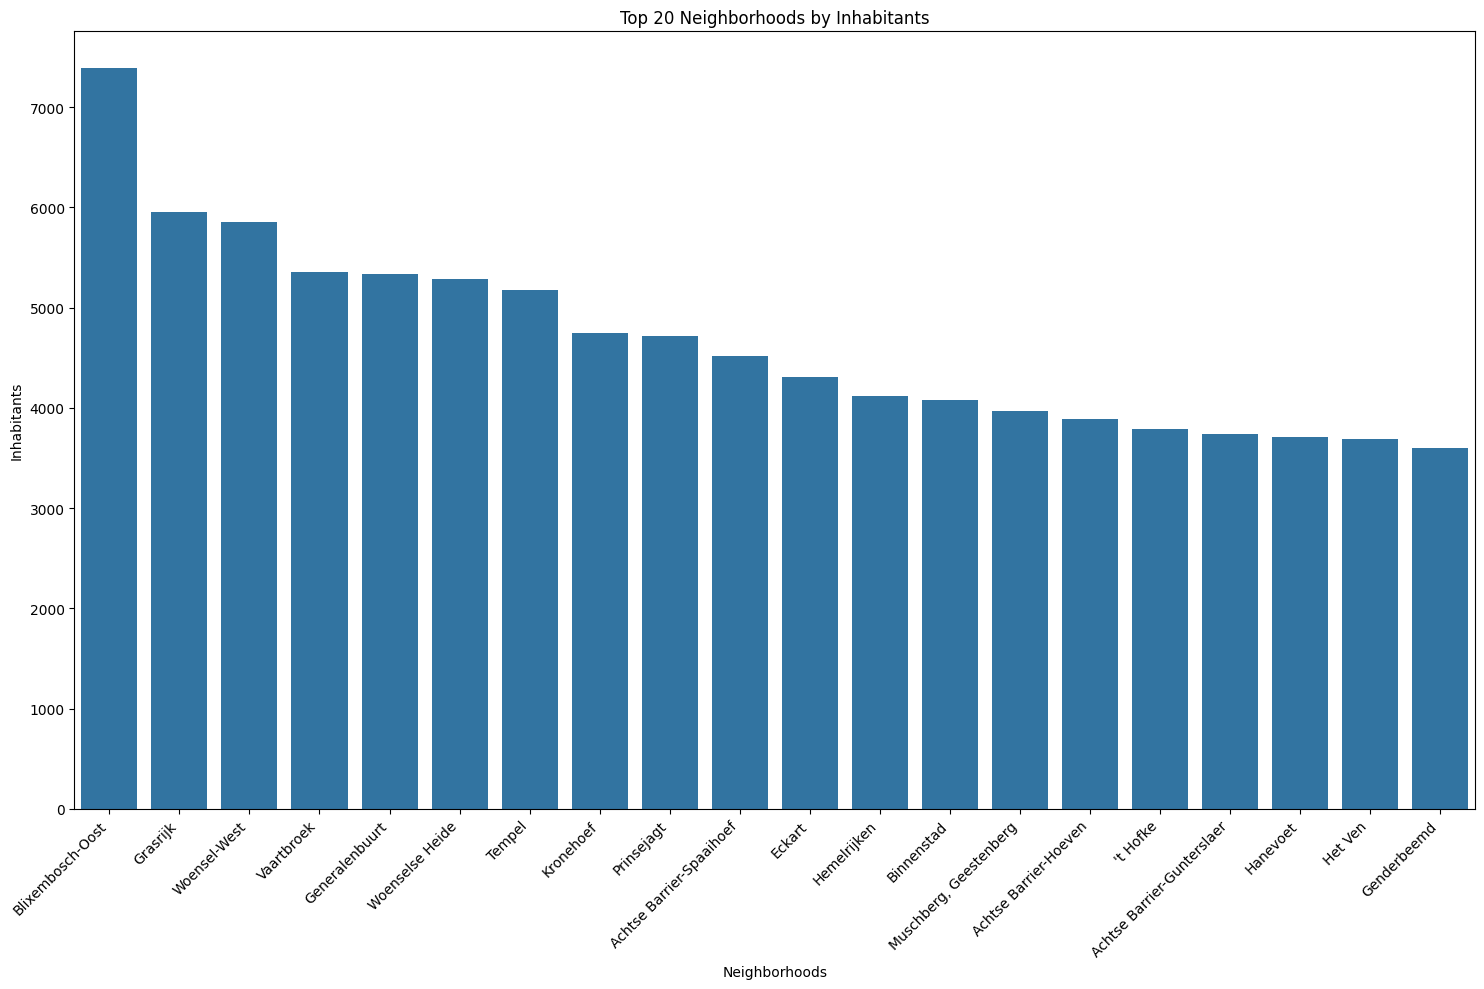

In [5]:
# Define the clean_data function
def clean_data(df):
    """
    Function to clean the data.
    Args:
    - df (DataFrame): Data to be cleaned

    Returns:
    - DataFrame: Cleaned data
    """
    # Handling missing values, except for 'Neighborhoods'
    df = df.dropna(subset=[col for col in df.columns if col != 'Neighborhoods'])

    # Converting columns that should be numeric
    for col in df.columns:
        if col != 'Neighborhoods' and df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col].str.replace(',', '.'), errors='coerce')

    print("Data cleaned successfully")
    return df

# Clean the data
data_clean = clean_data(data_translated)

# Inspect cleaned data
print(data_clean.head(20))

# Plot using Seaborn
# Focus on top 20 neighborhoods by population
top_neighborhoods = data_clean.nlargest(20, 'Inhabitants')

plt.figure(figsize=(15, 10))
sns.barplot(data=top_neighborhoods, x='Neighborhoods', y='Inhabitants')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Neighborhoods by Inhabitants')
plt.xlabel('Neighborhoods')
plt.ylabel('Inhabitants')
plt.tight_layout()
plt.show()

## EDA

In [6]:
# 1. Statistical Summary
print("\nStatistical Summary:")
print(data_clean.describe())


Statistical Summary:
       Inhabitants       Men %     Women %  Total 0-9 years  \
count   110.000000  108.000000  106.000000       110.000000   
mean   2237.181818   52.750000   47.510377       201.072727   
std    1622.686673    4.817831    4.452627       175.424398   
min      13.000000   37.200000   23.700000         0.000000   
25%     819.000000   50.100000   46.100000        67.750000   
50%    2141.000000   51.750000   48.250000       166.500000   
75%    3346.500000   54.200000   49.900000       306.500000   
max    7386.000000   76.300000   62.800000       870.000000   

       Total 10-19 years  Total 20-29 years  Total 30-39 years  \
count         110.000000         110.000000         110.000000   
mean          228.090909         406.700000         370.145455   
std           200.964762         363.605809         280.344802   
min             0.000000           3.000000           0.000000   
25%            78.000000         101.500000          99.500000   
50%           

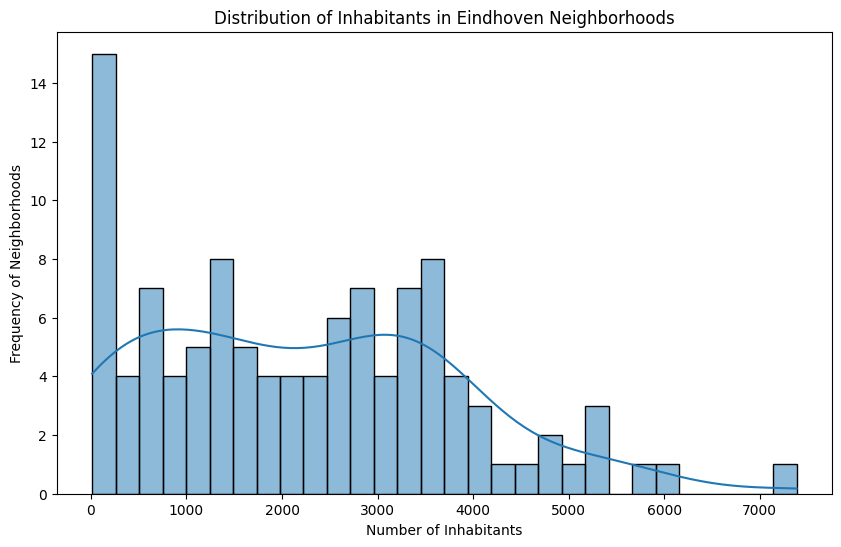

In [7]:
# 2. Distribution of Inhabitants
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['Inhabitants'], bins=30, kde=True)
plt.title('Distribution of Inhabitants in Eindhoven Neighborhoods')
plt.xlabel('Number of Inhabitants')
plt.ylabel('Frequency of Neighborhoods')
plt.show()

### Key Insight for Distribution Plot:
- The histogram shows that most neighborhoods in Eindhoven have fewer than 1000 inhabitants.
- There are a few neighborhoods with populations between 3000 and 4000, but these are less common.
- The distribution is right-skewed, indicating that there are fewer neighborhoods with higher populations.

In [8]:
# 3. Key Insights
print("\nKey Insights:")
print(f"Total number of neighborhoods: {data_clean['Neighborhoods'].nunique()}")
print(f"Average number of inhabitants: {data_clean['Inhabitants'].mean():.2f}")
print(f"Neighborhood with the highest population: {data_clean.loc[data_clean['Inhabitants'].idxmax(), 'Neighborhoods']}")


Key Insights:
Total number of neighborhoods: 114
Average number of inhabitants: 2237.18
Neighborhood with the highest population: Blixembosch-Oost
